# Brynjar

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import seaborn as sns
import numpy as np
plt.style.use('seaborn-v0_8-bright')
import calplot
import folium
from sklearn.linear_model import LinearRegression

In [95]:
# Coordinates for NFL teams
stadium_coordinates = pd.read_csv("DatasetNew/NFL_stadium_coordinates.csv")

# Attendance at each game from 2000 to 2019
game_attendance = pd.read_csv("DatasetNew/NFL_Attendance_2000_2019.csv")

# Information about each game from 1999 to 2023
games = pd.read_csv("DatasetNew/games.csv")

In [96]:
# Dictionary to map team names to abbreviations
team_abbr = {
    'Cardinals': 'ARI',
    'Falcons': 'ATL',
    'Ravens': 'BAL',
    'Bills': 'BUF',
    'Panthers': 'CAR',
    'Bears': 'CHI',
    'Bengals': 'CIN',
    'Browns': 'CLE',
    'Cowboys': 'DAL',
    'Broncos': 'DEN',
    'Lions': 'DET',
    'Packers': 'GB',
    'Texans': 'HOU',
    'Colts': 'IND',
    'Jaguars': 'JAX',
    'Chiefs': 'KC',
    'Raiders': 'LV',
    'Chargers': 'LAC',
    'Rams': 'LA',
    'Dolphins': 'MIA',
    'Vikings': 'MIN',
    'Patriots': 'NE',
    'Saints': 'NO',
    'Giants': 'NYG',
    'Jets': 'NYJ',
    'Eagles': 'PHI',
    'Steelers': 'PIT',
    '49ers': 'SF',
    'Seahawks': 'SEA',
    'Buccaneers': 'TB',
    'Titans': 'TEN',
    'Redskins': 'WAS'
}

# Extract the last name from team names
game_attendance['last_name'] = game_attendance['team_name'].apply(lambda x: x.split()[-1])

# Map team names to abbreviations
team_abbr_map = {team: team_abbr[team] for team in game_attendance['last_name'].unique()}

# Create a new column with abbreviations
game_attendance['team_abbr'] = game_attendance['last_name'].map(team_abbr_map)



In [97]:
game_score = games
team_data = game_attendance

game_score["gameday"] = pd.to_datetime(game_score['gameday'])
game_score['year'] = game_score['gameday'].dt.year


# Filter game_score for the years 2000 to 2019
game_score_filtered = game_score[(game_score['year'] >= 2000) & (game_score['year'] <= 2019)]

# Filter team_data for the years 2000 to 2019
team_data_filtered = team_data[(team_data['year'] >= 2000) & (team_data['year'] <= 2019)]

# Convert 'week' column to int type for consistency
game_score_filtered['week'] = game_score_filtered['week'].astype(int)


# Merge the filtered datasets on team abbreviation, week, and year
merged_data = pd.merge(game_score_filtered, team_data_filtered, left_on=['home_team', 'week', 'year'], right_on=['team_abbr', 'week', 'year'], how='inner')



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3515516576.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [100]:
final_data = pd.merge(merged_data, stadium_coordinates, left_on=['team_name'], right_on=["Team"], how='inner')

In [101]:
final_data.isna().sum()

game_id          0
season           0
game_type        0
week             0
gameday          0
              ... 
latitude         0
longitude        0
zip              0
pic              0
Unnamed: 6    3412
Length: 62, dtype: int64

In [102]:
final_data.columns

Index(['game_id', 'season', 'game_type', 'week', 'gameday', 'weekday',
       'gametime', 'away_team', 'away_score', 'home_team', 'home_score',
       'location', 'result', 'total_x', 'overtime', 'old_game_id', 'gsis',
       'nfl_detail_id', 'pfr', 'pff', 'espn', 'ftn', 'away_rest', 'home_rest',
       'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds',
       'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game',
       'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id',
       'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee',
       'stadium_id', 'stadium', 'year', 'team', 'team_name', 'total_y', 'home',
       'away', 'weekly_attendance', 'last_name', 'team_abbr', 'Team',
       'Conference', 'latitude', 'longitude', 'zip', 'pic', 'Unnamed: 6'],
      dtype='object')

In [105]:
result = final_data[["game_id","season","week","gameday","weekday","home_team","away_team","home_score","away_score","stadium", "team","team_name","weekly_attendance","last_name","team_abbr","Team","longitude","latitude", "away_qb_name", "home_qb_name", "away_coach", "home_coach"]]

In [106]:
result.isna().sum()

game_id              0
season               0
week                 0
gameday              0
weekday              0
home_team            0
away_team            0
home_score           0
away_score           0
stadium              0
team                 0
team_name            0
weekly_attendance    0
last_name            0
team_abbr            0
Team                 0
longitude            0
latitude             0
away_qb_name         0
home_qb_name         0
away_coach           0
home_coach           0
dtype: int64

In [107]:
# Create a new column to indicate the winning team
result['winning_team'] = result.apply(lambda row: row['home_team'] if row['home_score'] > row['away_score'] else row['away_team'], axis=1)

# Create a new column 'home_team_win'
result['home_team_win'] = result['home_team'] == result['winning_team']

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3983529507.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# Convert 'season' column to datetime format
result['season'] = pd.to_datetime(result['season'], format='%Y')
# Extract the year component
result['season'] = result['season'].dt.year

# Filter out rows where 'season' column equals 1999
result = result[result['season'] != 1999]

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_25612\3092826610.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [109]:
# SD and LAC THE SAME team
team_mapping = {
    'SD': 'LAC',
    # Add other mappings as necessary
}

In [110]:
# STL Land LA THE SAME team
team_mapping2 = {
    'STL': 'LA',
    # Add other mappings as necessary
}

In [111]:
result['home_team'] = result['home_team'].replace(team_mapping)
result['away_team'] = result['away_team'].replace(team_mapping)


In [112]:
result['home_team'] = result['home_team'].replace(team_mapping2)
result['away_team'] = result['away_team'].replace(team_mapping2)


In [113]:
result['team_abbr'] = result['team_abbr'].replace(team_mapping)
result['team_abbr'] = result['team_abbr'].replace(team_mapping2)

In [114]:
result.isna().sum()

game_id              0
season               0
week                 0
gameday              0
weekday              0
home_team            0
away_team            0
home_score           0
away_score           0
stadium              0
team                 0
team_name            0
weekly_attendance    0
last_name            0
team_abbr            0
Team                 0
longitude            0
latitude             0
away_qb_name         0
home_qb_name         0
away_coach           0
home_coach           0
winning_team         0
home_team_win        0
dtype: int64

In [115]:
result.to_csv('result_brynjar.csv', index=None)

In [116]:
result

,game_id,season,week,gameday,weekday,home_team,away_team,home_score,away_score,stadium,...,team_abbr,Team,longitude,latitude,away_qb_name,home_qb_name,away_coach,home_coach,winning_team,home_team_win
1,2000_01_TEN_BUF,2000,1,2000-09-03,Sunday,BUF,TEN,16.0,13.0,Ralph Wilson Stadium,...,BUF,Bills,-78.786978,42.773739,Steve McNair,Rob Johnson,Jeff Fisher,Wade Phillips,BUF,True
2,2000_02_GB_BUF,2000,2,2000-09-10,Sunday,BUF,GB,27.0,18.0,Ralph Wilson Stadium,...,BUF,Bills,-78.786978,42.773739,Brett Favre,Rob Johnson,Mike Sherman,Wade Phillips,BUF,True
3,2000_05_IND_BUF,2000,5,2000-10-01,Sunday,BUF,IND,16.0,18.0,Ralph Wilson Stadium,...,BUF,Bills,-78.786978,42.773739,Peyton Manning,Rob Johnson,Jim Mora,Wade Phillips,IND,False
4,2000_07_SD_BUF,2000,7,2000-10-15,Sunday,BUF,LAC,27.0,24.0,Ralph Wilson Stadium,...,BUF,Bills,-78.786978,42.773739,Jim Harbaugh,Rob Johnson,Mike Riley,Wade Phillips,BUF,True
5,2000_09_NYJ_BUF,2000,9,2000-10-29,Sunday,BUF,NYJ,23.0,20.0,Ralph Wilson Stadium,...,BUF,Bills,-78.786978,42.773739,Vinny Testaverde,Doug Flutie,Al Groh,Wade Phillips,BUF,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,2019_06_PIT_LAC,2019,6,2019-10-13,Sunday,LAC,PIT,17.0,24.0,StubHub Center,...,LAC,Chargers,-117.119525,32.783117,Devlin Hodges,Philip Rivers,Mike Tomlin,Anthony Lynn,PIT,False
4531,2019_09_GB_LAC,2019,9,2019-11-03,Sunday,LAC,GB,26.0,11.0,StubHub Center,...,LAC,Chargers,-117.119525,32.783117,Aaron Rodgers,Philip Rivers,Matt LaFleur,Anthony Lynn,LAC,True
4532,2019_11_KC_LAC,2019,11,2019-11-18,Monday,LAC,KC,17.0,24.0,Azteca Stadium,...,LAC,Chargers,-117.119525,32.783117,Patrick Mahomes,Philip Rivers,Andy Reid,Anthony Lynn,KC,False
4533,2019_15_MIN_LAC,2019,15,2019-12-15,Sunday,LAC,MIN,10.0,39.0,StubHub Center,...,LAC,Chargers,-117.119525,32.783117,Kirk Cousins,Philip Rivers,Mike Zimmer,Anthony Lynn,MIN,False


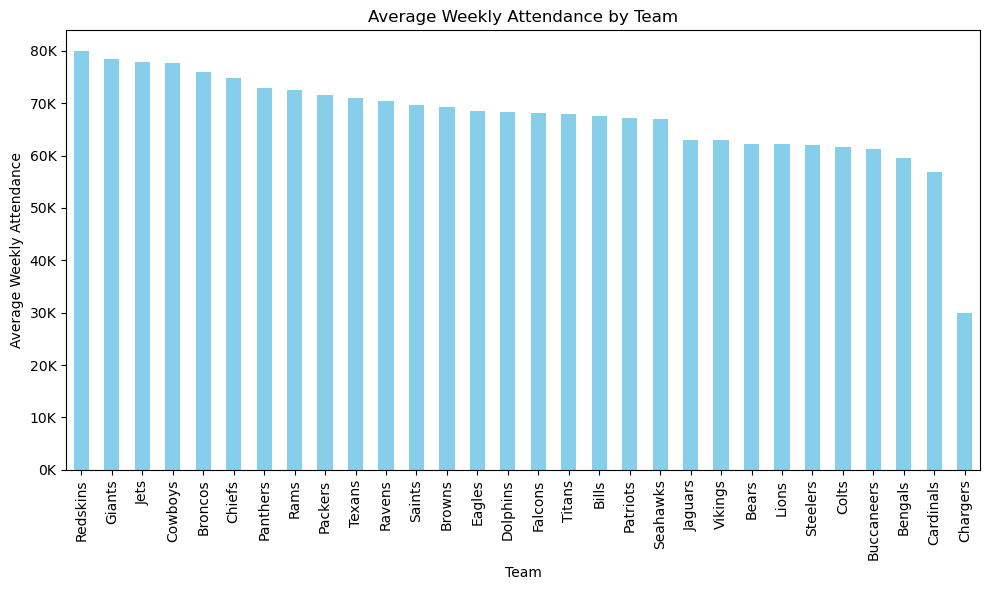

In [117]:
average_attendance = result.groupby('team_name')['weekly_attendance'].mean().sort_values(ascending=False)

# Generate the plot
plt.figure(figsize=(10, 6))
average_attendance.plot(kind='bar', color='skyblue')

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Calculate the maximum attendance (sum of weekly attendance for each team)
max_attendance = average_attendance.max()
max_tick = ((max_attendance + 10000) // 10000) * 10000

# Generate tick values at 10k intervals up to the maximum attendance
tick_values = range(0, int(max_tick) + 10000, 10000)
plt.yticks(tick_values, [f'{x/1000:.0f}K' for x in tick_values])

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show plot
plt.tight_layout()
plt.show()

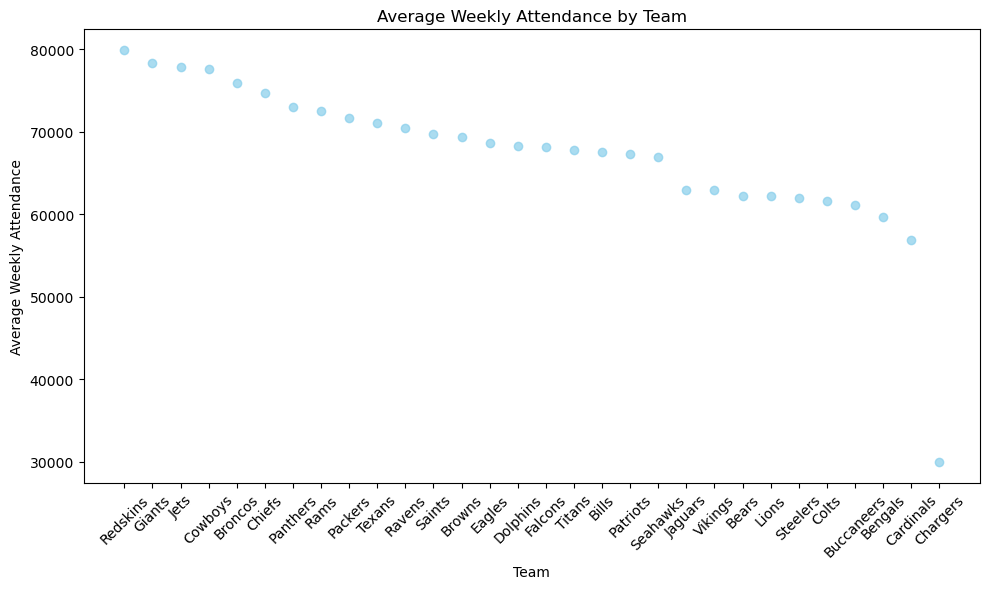

In [118]:
# Generate x and y values for the scatter plot
teams = average_attendance.index
average_attendances = average_attendance.values

# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(teams, average_attendances, color='skyblue', alpha=0.7)

# Set plot title and labels
plt.title('Average Weekly Attendance by Team')
plt.xlabel('Team')
plt.ylabel('Average Weekly Attendance')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.tight_layout()
plt.show()

In [ ]:
#Calculate the number of wins for each team
home_wins = result[result['home_score'] > result['away_score']]['home_team'].value_counts()
away_wins = result[result['away_score'] > result['home_score']]['away_team'].value_counts()

# Combine home and away wins for each team
total_wins = home_wins.add(away_wins, fill_value=0).sort_values(ascending=False)

print(total_wins)
print(sum(total_wins))

In [ ]:
result.columns

In [ ]:
import pandas as pd

# Assuming 'df' is your DataFrame containing the dataset
unique_stadiums = sorted(result['stadium'].unique())

# Print out each unique stadium
for stadium in unique_stadiums:
    print(stadium)


In [ ]:
result

In [ ]:
import pandas as pd

# Read the dataset


# 1. Data Preprocessing
# Check for missing values
print(result.isnull().sum())

# 2. Calculate Winning Percentage for QBs
qb_wins = result[result['winning_team'] == result['home_team']]['home_qb_name'].value_counts()
qb_losses = result[result['winning_team'] != result['home_team']]['home_qb_name'].value_counts()
qb_winning_percentage = (qb_wins / (qb_wins + qb_losses)) * 100

# Calculate Winning Percentage for Coaches
coach_wins = result[result['winning_team'] == result['home_team']]['home_coach'].value_counts()
coach_losses = result[result['winning_team'] != result['home_team']]['home_coach'].value_counts()
coach_winning_percentage = (coach_wins / (coach_wins + coach_losses)) * 100

# 3. Analyze Correlation
# For simplicity, let's just focus on the correlation between winning percentage and home team performance
# You can extend this analysis to include other factors if needed
home_team_performance = result[result['home_team_win'] == True]['home_team'].value_counts()

# Create a DataFrame with winning percentage, home team performance, and potentially other relevant factors
analysis_df = pd.DataFrame({
    'QB_Winning_Percentage': qb_winning_percentage,
    'Coach_Winning_Percentage': coach_winning_percentage,
    'Home_Team_Performance': home_team_performance
})

# Calculate correlation coefficients
correlation_matrix = analysis_df.corr()

# Print correlation matrix
print(correlation_matrix)

# 4. Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()
